In [2]:
from utils import *
from model import UNET

dataset = MyDataset()
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [0.8, 0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=False, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4)

DEVICE = 'cuda:0' if torch.cuda.is_available() else "cpu"
MODEL_PATH = 'YOUR-MODEL-PATH'
LOAD_MODEL = True
BATCH_SIZE = 16
LEARNING_RATE = 0.0005
EPOCHS = 5

def train_function(data, model, optim, loss_fn, device):
    print('Entering into train function')
    loss_values = []
    for X, y in data:

        X, y = X.to(device), y.to(device)
        preds = model(X.float())

        loss = loss_fn(preds, y.long())
        optim.zero_grad()
        loss.backward()
        optimizer.step()
        loss_values.append(loss.item())
    return loss_values


global epoch
epoch = 0 # epoch is initially assigned to 0. If LOAD_MODEL is true then
          # epoch is set to the last value + 1.
LOSS_VALS = [] # Defining a list to store loss values after every epoch


# Defining the model, optimizer and loss function
unet = UNET(layers=[3, 64, 128], classes=10).to(DEVICE).train() # [3, 64, 128] # 256, 512, 1024
optimizer = optim.Adam(unet.parameters(), lr=LEARNING_RATE)
loss_function = nn.CrossEntropyLoss(ignore_index=255)  # why?

# Loading a previous stored model from MODEL_PATH variable
if LOAD_MODEL == True:
    checkpoint = torch.load(MODEL_PATH, map_location=torch.device('cpu'))
    unet.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optim_state_dict'])
    epoch = checkpoint['epoch']+1
    LOSS_VALS = checkpoint['loss_values']
    print("Model successfully loaded!")

else:
    #Training the model for every epoch.
    for e in range(epoch, EPOCHS):
        print(f'Epoch: {e}')
        loss_val = train_function(train_loader, unet, optimizer, loss_function, DEVICE)
        LOSS_VALS.append(loss_val)
        torch.save({
            'model_state_dict': unet.state_dict(),
            'optim_state_dict': optimizer.state_dict(),
            'epoch': e,
            'loss_values': LOSS_VALS
        }, MODEL_PATH)
        print("Epoch completed and model successfully saved!")


Data Loaded Successfully!
Model successfully loaded!


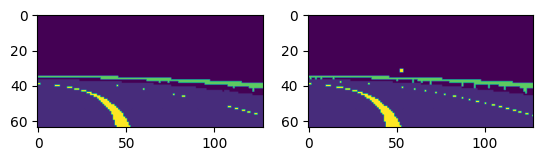

In [26]:
soft = torch.nn.Softmax(dim=0)

for x, y in test_loader:
    with torch.no_grad():
        preds = unet(x.float())
    break


import matplotlib.pyplot as plt
# plt.imshow([1])
idx = 99
img = torch.argmax(soft(preds[idx]), dim=0)
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(img);
ax2.imshow(y[idx]);